# Credit Risk Modeling in Python
`Course Description`

Project ini berfokus pada bagaimana mempersiapkan data credit application. Setelah itu, menggunakan machine learning and business rules untuk mengurangi risiko dan memastikan profitabilitas pada data kartu kredit atau pinjaman. Pada Project ini saya mendapat dataset dan materi pembelajaran dari Datacamp Yang dapat diakses pada link berikut __[link](https://app.datacamp.com/learn/courses/credit-risk-modeling-in-python)__

# 1. Exploring and Preparing Loan Data
`credit risk?` didefinisikan sebagai risiko kerugian yang terkait dengan kemungkinan kegagalan counterparty memenuhi kewajibannya; atau risiko bahwa debitur tidak membayar kembali utangnya.

`Expected loss`
Expected Loss
adalah jumlah kerugian perusahaan sebagai akibat dari default pada pinjaman.Expected loss adalah perhitungan sederhana dari tiga komponen
__Probabilitas default__, yang merupakan kemungkinan seseorang akan default pada pinjaman.
__Eksposur saat default__ yang merupakan jumlah terutang pada saat default.
Dan __kerugian yang diberikan default__ yang merupakan rasio eksposur terhadap setiap pemulihan dari kerugian tersebut.

`Jenis data yang digunakan`
 __Yang pertama__ adalah data aplikasi, yaitu data yang terkait langsung dengan aplikasi pinjaman seperti peringkat pinjaman. __Yang kedua__ adalah data perilaku, yang menggambarkan penerima pinjaman, seperti masa kerja.

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#Load Data
cr_loan = pd.read_csv('Raw credit data.csv')
# Check 5 row pertama data
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
cr_loan.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
cats = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
nums = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt' ,'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

In [5]:
cr_loan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
cr_loan[cats].describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


loan_status menunjukkan apakah pinjaman default=1 dan 0 = non-default.

Data terdiri dari 32581 row dan 12 kolom

Kolom `person_emp_length` , dan `loan_int_rate` memiliki missing value 

kolom masih memiliki banyak nilai outlier.

Sebanyak 6.453  credit application untuk alasan EDUCATION

Sebanyak 16.446(50%) credit application kepemilikan rumahnya RENT

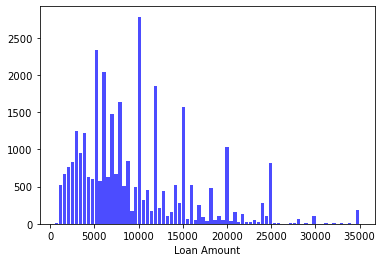

In [7]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

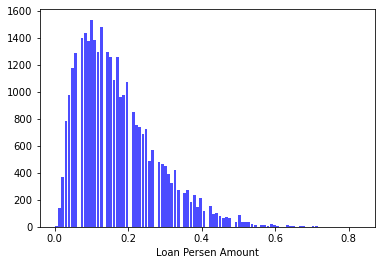

In [8]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_percent_income'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Persen Amount")
plt.show()

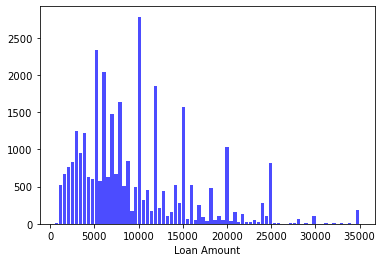

In [9]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

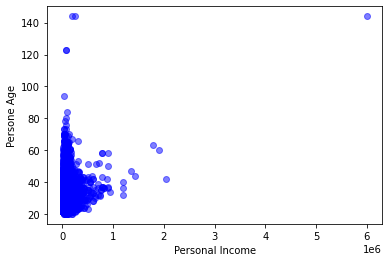

In [10]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

### Crosstab and pivot tables
Dengan cross tables,  mendapatkan tampilan tingkat tinggi dari kolom yang dipilih.

In [11]:
# cross table dari loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [12]:
# cross table dari loan intent and loan status
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
person_home_ownership,,,
MORTGAGE,11754,1690,13444
OTHER,74,33,107
OWN,2391,193,2584
RENT,11254,5192,16446
All,25473,7108,32581


In [13]:
#  cross table dari home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc= 'mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


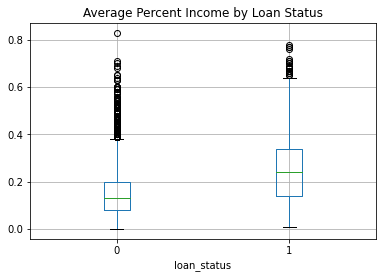

In [14]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

persentase rata-rata pendapatan untuk default lebih tinggi.

dari 16.446(50%) credit application kepemilikan rumahnya RENT dan hanya 5.192(30%) nya default

dari 6.453 credit application untuk alasan EDUCATION hanya 1.111 nya default

### Outlier

In [15]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [16]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [17]:
# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


In [18]:
cr_loan_new.shape

(32579, 12)

 Pada `person_emp_length` Tidak mungkin seseorang memiliki masa kerja  lebih dari 60 tahun.
hapus nilai `person_emp_length` yang lebih dari 60. Sekarang data tinggal 32579 row

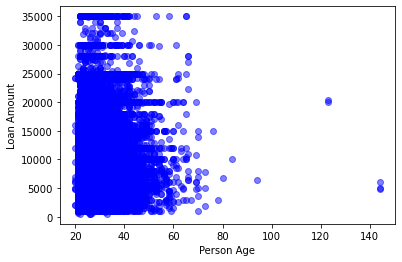

In [19]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [20]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new2 = cr_loan_new.drop(cr_loan_new[cr_loan_new['person_age'] > 100].index)

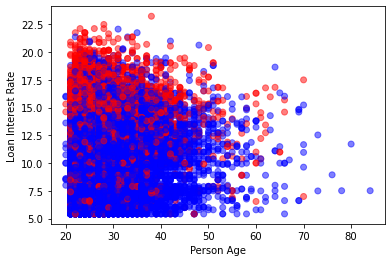

In [21]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new2['person_age'], cr_loan_new2['loan_int_rate'],
            c = cr_loan_new2['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

pada kolom `person_age` memiliki nilai 140. sangat tidak mungkin mengajukan pinjaman berusia lebih dari 100 tahun.
dan saya mengeluarkan nilai nya dengan membatasi nilai `person_age` < 100

Dari visualisasi pinjaman default dan non-default, dan sepertinya ada lebih banyak default dengan suku bunga tinggi.

### missing data In loan data
Selain masalah Outlier, masalah yang umum adalah missing data(data yang hilang) hal tersebut berdampak negatif pada kinerja model prediktif. Ini dapat membuat model kita menjadi bias dengan cara yang tidak terduga, yang dapat memengaruhi cara kita memprediksi default. Hal ini dapat mengakibatkan kami memprediksi sejumlah besar default yang sebenarnya bukan default karena modelnya bias terhadap default. Selain itu, banyak model Machine learning di Python tidak secara otomatis mengabaikan nilai yang hilang, dan akan sering menimbulkan kesalahan dan menghentikan pelatihan.

`How to handle missing data`
umumnya missing data ditangani dengan cara berikut. 
1. Replace values where the data is missing
2. Remove the rows containing missing data
3. menyimpan nilai-nilai yang hilang juga. Namun, ini tidak terjadi pada sebagian besar data pinjaman. 

Dengan Memahami dataset akan mengarahkan ke salah satu dari tiga tindakan diatas

Pada awal eksplorasi Kolom `person_emp_length` , dan `loan_int_rate` memiliki missing value 

In [22]:
# Print a null value column array
print(cr_loan_new2.columns[cr_loan_new2.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [23]:
# Print the top five rows with nulls for employment length
cr_loan_new2[cr_loan_new2['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


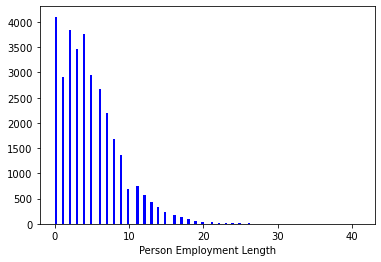

In [24]:
# Impute the null values with the median value for all employment lengths
cr_loan_new2['person_emp_length'].fillna((cr_loan_new2['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan_new2['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [25]:
# Print the number of nulls
print(cr_loan_new2['loan_int_rate'].isnull().sum())

3115


In [26]:
# Store the array on indices
indices = cr_loan_new2[cr_loan_new2['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan_new2.drop(indices)

In [27]:
cr_loan_clean.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Data memiliki 2 kolom yang memiliki missing value pada `person_emp_length` dan `loan_int_rate`

Pada kolom `person_emp_length` menggantinya dengan median

Pada kolom `loan_int_rate` memiliki Missing Value 3.116. Suku bunga ditetapkan oleh nasabah maka kehilangan data di kolom ini sangat aneh. Ada kemungkinan bahwa masalah penyerapan data. saya melakukan drop() untuk missing value nya.

### ONE HOT ENCODING
`One-hot encoding` adalah Teknik untuk mewakili string dengan nilai numerik.
Data  berisi kolom non-numerik seperti `loam_intent`, yang menggunakan kata-kata untuk menggambarkan bagaimana orang tersebut berencana menggunakan uang yang dipinjamkan kepada mereka. Machine Learning tidak tahu cara menggunakan nilai non-numerik ini. Jadi, kita harus melakukan operasi yang disebut one-hot encoding sebelum kita dapat menggunakannya.

Berikut adalah cara kerjanya.
Mari kita pikirkan tentang kolom maksud pinjaman di mana setiap pinjaman memiliki nilai niatnya sendiri sebagai string. Sampel ini memiliki pendidikan, kedokteran, dan usaha. Dengan One-hot encoding, kami mendapatkan satu set kolom baru di mana setiap nilai dari `loam_intent` sekarang menjadi kolomnya sendiri. Setiap kolom baru dibuat dengan memisahkan pinjaman dengan setiap nilai maksud dan membuat nilai kolom baru menjadi 0 atau 1. Misalnya, jika tujuan pinjaman adalah pendidikan, sekarang diwakili dengan 1 di kolom tujuan pinjaman pendidikan.
Untuk menyandikan kolom string secara one-hot, kami menggunakan fungsi get dummies di dalam pandas. 
1. Pertama, memisahkan kolom numerik dan non-numerik
2. dengan fungsi get dummies untuk mengkodekan one-hot encode hanya kolom non-numerik.
3. menggabungkan dua set dan hasilnya adalah set data lengkap untuk diproses

In [28]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)
# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


### Creating training and test sets

`test_train_split()` digunakan untuk memisahkan data train dan data test. Data train digunakan untuk membuat prediksi, sedangkan data test digunakan untuk evaluasi. Tanpa mengevaluasi model, kita tidak memiliki cara untuk mengetahui seberapa baik kinerjanya pada data loan baru.
`Selain intersep_`, yang merupakan atribut model, model `LogisticRegression()` juga memiliki atribut `.coef_`. Ini menunjukkan betapa pentingnya setiap kolom pelatihan untuk memprediksi probabilitas default.


`Training a logistic regression`
In this course, we use the logistic regression within scikit learn. The use of the model is easy. Like any function, you can pass in parameters or not. The solver parameter is an optimizer, just like the solver in Excel. LBFGS is the default. To train the model, we call the fit method on it. Within the method, we have to provide the model with training columns and training labels. We use ravel from numpy to make the labels a one-dimensional array instead of a data frame. In our credit data, the training columns are every column except the loan status. The loan status contains the labels.

Dalam latihan ini, kami menggunakan `regresi logistik` dalam `scikit learn`. Seperti fungsi apa pun, Anda dapat memasukkan parameter atau tidak. Parameter solver adalah pengoptimal, sama seperti solver di Excel. LBFGS adalah default. Untuk melatih model, kami memanggil metode fit di atasnya. Di dalam metode, kita harus menyediakan model dengan kolom pelatihan dan label pelatihan. Kami menggunakan ravel dari numpy untuk membuat label array satu dimensi, bukan bingkai data. Dalam data kredit kami, kolom pelatihan adalah setiap kolom kecuali status pinjaman. Status pinjaman berisi label.


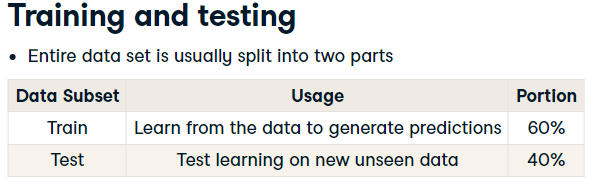

In [29]:
# import modules
from sklearn.model_selection import train_test_split

# Split Feature and Label
X = cr_loan_prep.drop(['loan_status'], axis=1)
y = cr_loan_prep['loan_status'] # target / label

#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

# 2. Logistic Regression
`Logistic regression`
Logistic Regression adalah model yang digunakan untuk melakukan prediksi apakah sesuatu bernilai benar atau salah (0 atau 1).pada logistic regression garis yang dibentuk mirip dengan huruf “S” antara titik 0 sampai 1.

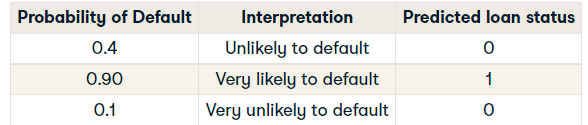

`Predicting probabilities`
Untuk mendapatkan probabilitas, kami melatih model machine learning pada data credit kami, yang dikenal sebagai fitur, sehingga model mempelajari cara menggunakan data untuk memprediksi probabilitas.
model yang dipakei, `model klasifikasi`, di mana kelasnya adalah default atau non-default.
Dalam industri, dua model sering digunakan. Ini adalah `logistic regressions, and decision trees`. Kedua model ini dapat memprediksi probabilitas default, dan memberi tahu kami betapa pentingnya setiap kolom untuk prediksi.

In [30]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.445779
1            1      0.223447
2            0      0.288558
3            0      0.169358
4            1      0.114182


Neat! We have some predictions now, but they don't look very accurate do they? It looks like most of the rows with loan_status at 1 have a low probability of default. How good are the rest of the predictions? Next, let's see if we can determine how accurate the entire model is.

In [38]:
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
preds_df_lr= pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df_lr['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



accuracy score: 0.80253


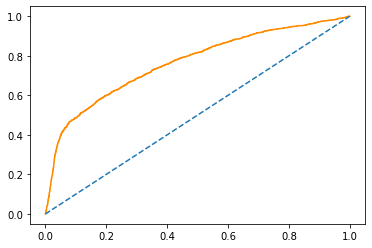

SKOR AUC: 0.76432


In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
acuracy = clf_logistic.score(X_test, y_test)
print("accuracy score: %.5f" % acuracy)

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)
print("SKOR AUC: %.5f" % auc)

# GBT USING XGBOST
>Decision trees adalah standard model pada credit risk. Pada sesi ini Kami akan menggunakan decision trees dengan menggunakan paket XGBoost. Setelah mengembangkan model, kami akan menguji kinerjanya dan melihat  pemilihan kolom dalam data yang tidak seimbang.

Decision trees adalah machine learning models yang menggunakan keputusan sebagai langkah dalam proses untuk akhirnya mengidentifikasi status pinjaman.

Berikut adalah contoh pohon keputusan sederhana. Kotak pertama, atau simpul, telah memutuskan untuk membagi data menjadi dua kelompok. Mereka yang memiliki masa kerja di atas 10, dan mereka yang di bawah. Kemudian menggunakan tujuan pinjaman medis dengan cara yang sama. Hasil dari pemisahan ini adalah keputusan ya dan tidak yang pada akhirnya mengarah pada status pinjaman yang diprediksi default atau non-default.

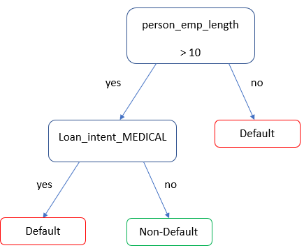

## Trees for defaults
You will now train a gradient boosted tree model on the credit data, and see a sample of some of the predictions. Do you remember when you first looked at the predictions of the logistic regression model? They didn't look good. Do you think this model be different?

The credit data cr_loan_prep, the training sets X_train and y_train, and the test data X_test is available in the workspace. The XGBoost package is loaded as xgb.

In [43]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df  = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.990942
1            1      0.983987
2            0      0.000807
3            0      0.001239
4            1      0.084892


Interesting! The predictions don't look the same as with the LogisticRegression(), do they? Notice that this model is already accurately predicting the probability of default for some loans with a true value of 1 in loan_status.

## Gradient boosted portfolio performance
At this point you've looked at predicting probability of default using both a LogisticRegression() and XGBClassifier(). You've looked at some scoring and have seen samples of the predictions, but what is the overall affect on portfolio performance? Try using expected loss as a scenario to express the importance of testing different models.

A data frame called portfolio has been created to combine the probabilities of default for both models, the loss given default (assume 20% for now), and the loan_amnt which will be assumed to be the exposure at default.

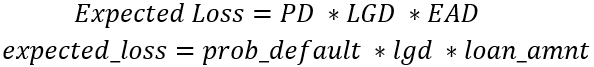

In [44]:
# Train logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
# Create predictions of probability for loan status
preds = clf_logistic.predict_proba(X_test)
# Create dataframes predictions,
lr_prob_default = pd.DataFrame(preds[:,1], columns = ['lr_prob_default'])
lr_prob_default.head()

,lr_prob_default
0,0.445779
1,0.223447
2,0.288558
3,0.169358
4,0.114182


In [45]:
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))
gbt_preds = clf_gbt.predict_proba(X_test)                                # Predict with a model
gbt_prob_default = pd.DataFrame(gbt_preds[:,1], columns = ['gbt_prob_default']) # Create dataframes of first five predictions
gbt_prob_default.head()

,gbt_prob_default
0,0.990942
1,0.983987
2,0.000807
3,0.001239
4,0.084892


In [46]:
#GABUNGKAN
porto = pd.concat([gbt_prob_default, lr_prob_default], axis = 1)
porto.head()

,gbt_prob_default,lr_prob_default
0,0.990942,0.445779
1,0.983987,0.223447
2,0.000807,0.288558
3,0.001239,0.169358
4,0.084892,0.114182


In [47]:
# Adding new column loss given default  with a constant
porto["lgd"] = 0.2
porto.head()

,gbt_prob_default,lr_prob_default,lgd
0,0.990942,0.445779,0.2
1,0.983987,0.223447,0.2
2,0.000807,0.288558,0.2
3,0.001239,0.169358,0.2
4,0.084892,0.114182,0.2


In [48]:
loan = pd.DataFrame(X_test['loan_amnt'])
loan_amn = loan.reset_index(drop=True)
loan_amn.head()

,loan_amnt
0,15000
1,11200
2,15000
3,10800
4,3000


In [49]:
portfolio = pd.concat([porto, loan_amn], axis = 1)
portfolio.head()

,gbt_prob_default,lr_prob_default,lgd,loan_amnt
0,0.990942,0.445779,0.2,15000
1,0.983987,0.223447,0.2,11200
2,0.000807,0.288558,0.2,15000
3,0.001239,0.169358,0.2,10800
4,0.084892,0.114182,0.2,3000


In [50]:
# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

LR expected loss:  5596776.979852879
GBT expected loss:  5383982.8120276965


total expected loss untuk model XGBClassifier() sedikit lebih rendah. Ketika kita berbicara tentang akurasi dan presisi, tujuannya adalah untuk menghasilkan model yang memiliki kerugian yang diharapkan rendah.

## Assessing gradient boosted trees
So you've now used XGBClassifier() models to predict probability of default. These models can also use the .predict() method for creating predictions that give the actual class for loan_status.

You should check the model's initial performance by looking at the metrics from the classification_report(). Keep in mind that you have not set thresholds for these models yet.

The data sets cr_loan_prep, X_test, and y_test have already been loaded in the workspace. The model clf_gbt has been loaded as well. The classification_report() for the logistic regression will print automatically.

In [51]:
from sklearn.metrics import classification_report
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



Wow. Have a look at the precision and recall scores! Remember the low default recall values we were getting from the LogisticRegression()? This model already appears to have serious potential.

# Column selection for credit risk
Cara mudah pertama untuk mengetahui kolom mana yang penting adalah dengan memeriksa `feature importances` menggunakan metode `.get_booster()` dan `.get_score()` secara bersamaan, yang menunjukkan berapa kali kolom muncul di semua pohon model.

In [52]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'person_age': 287.0, 'person_income': 722.0, 'person_emp_length': 286.0, 'loan_amnt': 349.0, 'loan_int_rate': 503.0, 'loan_percent_income': 262.0, 'cb_person_cred_hist_length': 168.0, 'person_home_ownership_MORTGAGE': 40.0, 'person_home_ownership_OTHER': 2.0, 'person_home_ownership_OWN': 48.0, 'person_home_ownership_RENT': 57.0, 'loan_intent_DEBTCONSOLIDATION': 53.0, 'loan_intent_EDUCATION': 40.0, 'loan_intent_HOMEIMPROVEMENT': 36.0, 'loan_intent_MEDICAL': 63.0, 'loan_intent_PERSONAL': 30.0, 'loan_intent_VENTURE': 34.0, 'loan_grade_A': 1.0, 'loan_grade_B': 33.0, 'loan_grade_C': 41.0, 'loan_grade_D': 40.0, 'loan_grade_E': 26.0, 'loan_grade_F': 9.0, 'loan_grade_G': 12.0, 'cb_person_default_on_file_N': 29.0}


That's how you do it! So, the importance for loan_grade_F is only 6 in this case. This could be because there are so few of the F-grade loans. While the F-grade loans don't add much to predictions here, they might affect the importance of other training columns.

## Visualizing column importance

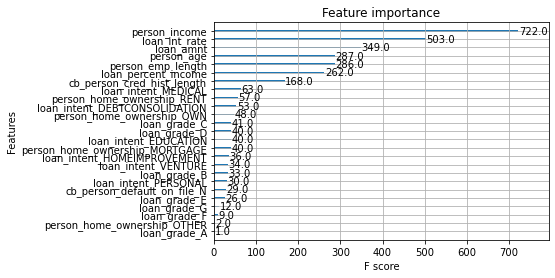

In [53]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

Dari Visualisasi Diatas loan_grade_A, Person_home_ownership tidak terlalu penting

# Class imbalance in loan data

In [54]:
y_train.value_counts()

0    13798
1     3877
Name: loan_status, dtype: int64

Dari data train diatas, jumlah default dan non-default tidak sama. Dalam data pelatihan,jauh lebih banyak non-default daripada default. Ini adalah Class imbalance , yang merupakan masalah.

In [55]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [56]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults    = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

0    3877
1    3877
Name: loan_status, dtype: int64


Sekarang set pelatihan sudah memiliki jumlah default dan non-default yang sama. Saatnya uji machine learmimg pada data baru dan bandingkan kinerjanya dengan model yang dilatih pada kumpulan data biasa.

In [57]:
# Split Feature and Label
X = X_y_train_under.drop(['loan_status'], axis=1)
y = X_y_train_under['loan_status'] # target / label

#Karena ini hanya data train jadi tidak memakai Train test split
# Train a model
clf_gbt2 = xgb.XGBClassifier().fit(X, np.ravel(y))

In [58]:
# Predict the labels for loan status
gbt2_preds = clf_gbt2.predict(X_test)

In [59]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.72      0.83      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.83      0.87      0.85     11784
weighted avg       0.90      0.89      0.89     11784



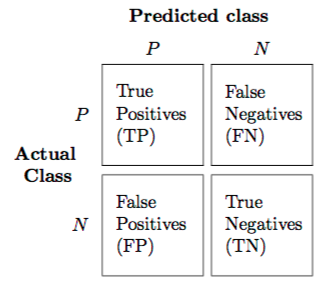

In [60]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix for both old and new models
print('confusion matrix Model 1')
print(confusion_matrix(y_test,gbt_preds))
print('confusion matrix Model 2')
print(confusion_matrix(y_test,gbt2_preds))

confusion matrix Model 1
[[9085  113]
 [ 677 1909]]
confusion matrix Model 2
[[8356  842]
 [ 444 2142]]


In [61]:
from sklearn.metrics import roc_auc_score
# Print and compare the AUC scores of the old and new models
print('confusion matrix Model 1')
print(roc_auc_score(y_test,gbt_preds))
print('confusion matrix Model 2')
print(roc_auc_score(y_test,gbt2_preds))

confusion matrix Model 1
0.8629602218579747
confusion matrix Model 2
0.8683823125071576


Dengan Class imbalance Model lebih peka Terhadap nilai default sekaligus menaikkan Akurasi kita

## 4. Model evaluation

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, gbt2_preds, target_names=target_names))


# Print the logistic regression AUC with formatting
print("F-1 scores for the logistic regression: %0.5f" % precision_recall_fscore_support
                              (y_test, preds_df_lr['loan_status'], average = 'macro')[2])

# Print the gradient boosted tree AUC with formatting
print("'F-1 scores for the gradient boosted tree: %0.5f" % precision_recall_fscore_support
                              (y_test,gbt2_preds, average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.72      0.83      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.83      0.87      0.85     11784
weighted avg       0.90      0.89      0.89     11784

F-1 scores for the logistic regression: 0.57873
'F-1 scores for the gradient boosted tree: 0.84883


In [74]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, prob_default))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, gbt2_preds))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.87


### Comparing with ROCs
AUC adalah area antara kurva dan prediksi acak. Model dengan daya angkat lebih tinggi, dan AUC lebih tinggi, adalah model yang lebih baik dalam membuat prediksi secara akurat.

In [81]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, prob_default)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt2_preds)

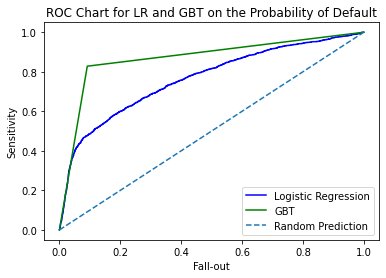

In [82]:
# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

Dari pemodelan kita Disimpulkan bahwa Model yang paling akurat adalah memakai `Gradient Boosted Trees Using XGBoost`

Dengan Akurasi sebesar `0.87`